In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

# from bo_functions_GP_Analysis import test_train_split
from bo_functions_GP_Analysis import LSO_LOO_Analysis
from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
emulator = True
save_fig = False

Theta_True = np.array([1,-1])
train_iter = 300
noise_std = 0.1
shuffle_seed = 9
set_lengthscale = None

if emulator == True:
    len_data = 100
else:
    len_data = 20

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  09-Sep-2022 (17:57:31)


Lengthscale Set To: None


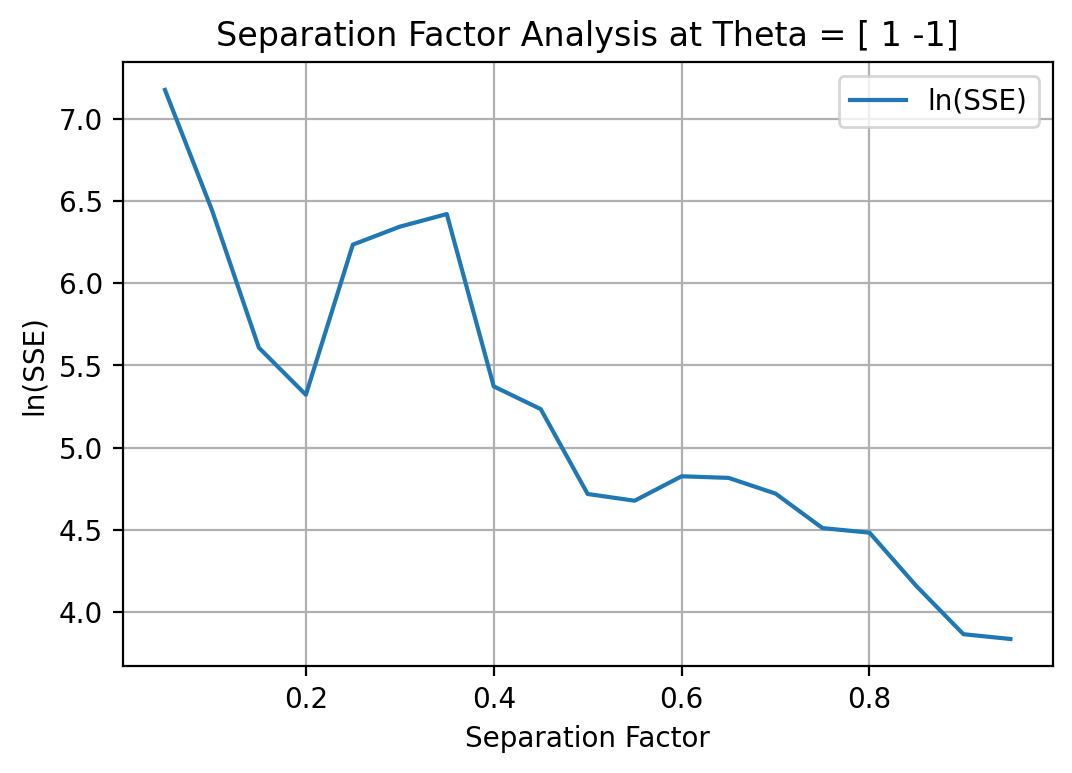

CPU times: user 16.8 s, sys: 27.8 ms, total: 16.8 s
Wall time: 16.9 s


In [6]:
%%time
obj = "obj"

LOO = False
LSO = True
verbose = False

print("Lengthscale Set To:", set_lengthscale)
results = LSO_LOO_Analysis(theta_mesh,Theta_True,train_iter, Xexp, Yexp,
                                 noise_std, obj, emulator, set_lengthscale, len_data, verbose, 
                                 save_fig, shuffle_seed, DateTime, LOO, LSO)